In [1]:
!python3 -m pip install ipywidgets
!python3 -m pip install matplotlib
!python3 -m pip install numpy

# downgraded due to a bug
!python3 -m pip install opencv-python==4.5.5.64
!python3 -m pip install opencv-python-headless==4.5.5.64
!python3 -m pip install opencv-contrib-python==4.5.5.64

!python3 -m pip install pandas
!python3 -m pip install Pillow
!python3 -m pip install sklearn
!python3 -m pip install tensorflow
!python3 -m pip install tensorflow_datasets

     ---------------------------------------- 42.2/42.2 MB 8.8 MB/s eta 0:00:00


In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [35]:
# mobilenet = tf.keras.applications.mobilenet_v2.MobileNetV2()
mobilenet = tf.keras.applications.MobileNetV2()
model = mobilenet

In [ ]:
@tf.function
def detect_objects_in_image(image):
    pass
    # image, shapes = 

(-0.5, 223.5, 223.5, -0.5)

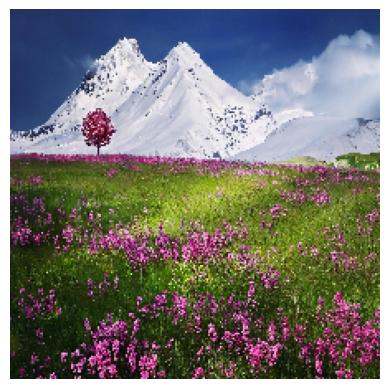

In [34]:
img_path = tf.keras.utils.get_file(
    "mountains.jpg",
    "https://storage.googleapis.com/gcptutorials.com/examples/mountains.jpg"
)

img = tf.keras.preprocessing.image.load_img(img_path, target_size=[224, 224])

plt.imshow(img)
plt.axis("off")

In [36]:
# TODO: what if I hadn't resized the image first?
array = tf.keras.preprocessing.image.img_to_array(img)
print(array.shape)

something = array[tf.newaxis, ...]
preprocessed_array = tf.keras.applications.mobilenet_v2.preprocess_input(something)
print(preprocessed_array.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [37]:
predictions = model(preprocessed_array)
print(predictions)

tf.Tensor(
[[8.27231997e-05 1.92700711e-04 5.57219260e-04 3.30371404e-04
  1.31843291e-04 6.70068766e-05 2.79191998e-04 1.03974766e-04
  5.19415189e-05 2.80596287e-04 2.04269003e-04 4.08462452e-04
  2.97682243e-04 1.87158948e-04 4.09612432e-04 7.63949720e-05
  4.15825867e-04 7.60448631e-04 2.23477691e-04 5.17302600e-04
  3.29023809e-04 2.80791312e-04 5.39363027e-05 3.07386043e-04
  2.81826855e-04 3.74811032e-04 1.57384187e-04 2.24979507e-04
  2.74748745e-04 1.34676971e-04 2.12577623e-04 1.18000673e-04
  8.08788463e-05 5.15371539e-05 3.15246201e-04 6.05213500e-05
  1.24208338e-04 4.17780357e-05 1.61961914e-04 1.48619220e-04
  6.14912540e-04 1.85057521e-04 3.12732387e-04 1.75071735e-04
  2.90452066e-04 2.31299418e-04 3.65608459e-04 1.16478193e-04
  9.13422555e-05 3.57879180e-05 5.00615221e-04 1.95046407e-04
  3.11926822e-04 1.94653680e-04 7.52999986e-05 2.72437261e-04
  1.48936117e-04 1.11059293e-04 1.09339257e-04 2.24474570e-04
  5.83911205e-05 3.74331976e-05 5.39924004e-05 6.67944187e-

In [38]:
argsorted_predictions = np.argsort(predictions)
# top_5_classes_indices = argsorted_predictions[0,::-1][:5] + 1
top_5_classes_indices = argsorted_predictions[0,::-1][:5] + 1

print(top_5_classes_indices)

[971 981 426 980 916]


In [39]:
labels_path = tf.keras.utils.get_file(
    "imagenet-labels.txt",
    "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
)

labels = np.array(open(labels_path).readlines())

In [40]:
top_5_classes = labels[top_5_classes_indices]
print(top_5_classes)

['alp\n' 'volcano\n' 'barn\n' 'valley\n' 'yurt\n']


# garbage
